##Linear Regression with Python

In this machine problem (MP), you will implement a simple linear regression model in Python. You will create your own dataset and visualize the results using Matplotlib.



In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def reset_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

**Task 1: Data Preparation**

Write a Python function named `generate_data` that takes the following parameters:

1.   `num_examples`: representing the number of data points to generate.
2.   `input_dim`: representing the dimensionality of data points to generate (without the bias dimension)

Inside the function:

1.   Specify the linear coefficient w and bias term (generate them randomly).
2.   Generate `num_examples` random values with dimension `input_dim`.
3.   Calculate the corresponding target variable `y`.
4.   (**opition**) Add random noise to `y` using a normal distribution with mean 0 and a pre-specified standard deviation.

Return:

1.   `data`: shape (num_examples, input_dim + 1), where the first dimension is the additional dimension and has value of 1.
2.   `y`: the target variable.

In [2]:
def generate_data(num_example, input_dim):
    """
    This function generates a dataset for linear regression.
    """
    data, gt_y = None, None
    ###########################################
    ## TODO: Generate random data points and ##
    ## corresponding ground truth y values   ##
    ###########################################

    gt_w = np.random.randn(input_dim + 1, 1)

    data = np.random.rand(num_example, input_dim+1)
    data[:, 0] = 1

    gt_y = data @ gt_w
    # gt_y += np.random.randn(num_example, 1) * 0.1

    ###########################################
    ############ End of your code #############
    ###########################################

    return data, gt_y

**Task 2: Data Visualization**

Generate synthetic data using your `generate_data` function.
Create scatter plots to visualize the generated data points by setting input_dim to 1.


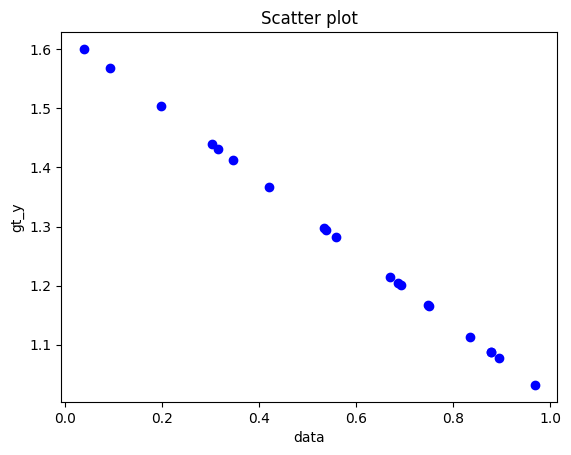

In [3]:
num_example = 20
input_dim = 1
reset_seed(1)

data, gt_y = generate_data(num_example, input_dim)

plt.scatter(data[:,1], gt_y, label='Data Points', color='blue', marker='o')
plt.xlabel('data')
plt.ylabel('gt_y')
plt.title('Scatter plot')
plt.show()

**Task 3: Data Splitting for Model Training**

Split the created dataset into a training set and a validation set. Please use the variable `train_perc` to control the proportion of data used for training. Splitting data into separate sets is crucial for evaluating machine learning models.

Inside the function:

1.   Calculate the number of samples to include in the training set and the validation set based on the `train_perc` parameter, which is a floating-point number between 0 and 1, indicating the proportion of data to be used for training. For example, if `train_perc` = 0.8, 80% of the data will be used for training, and the remaining 20% will be used for validation.

2.   Randomly shuffle the data to ensure that it's not sorted in any particular order.

3.   Split the data into training and validation sets according to the specified proportions.



In [4]:
# train test split
def train_test_split(data, gt_y, train_perc):
    """Split the dataset into training and validation set."""
    assert(train_perc > 0. and train_perc <= 1.)
    data_train, y_train, data_test, y_test = None, None, None, None

    ##################################################
    ## TODO: split data and gt_y into train and val ##
    ##################################################

    num_train = int(train_perc * data.shape[0])
    inds = np.arange(data.shape[0])
    np.random.shuffle(inds)
    train_inds = inds[: num_train]
    test_inds = inds[num_train :]

    data_train = data[train_inds]
    y_train = gt_y[train_inds]
    data_test = data[test_inds]
    y_test = gt_y[test_inds]

    ##################################################
    ################ End of your code ################
    ##################################################

    return data_train, y_train, data_test, y_test

reset_seed(1)
train_perc = 0.3
data_train, y_train, data_test, y_test = train_test_split(data, gt_y, train_perc)
print(data_train.shape)

(6, 2)


**Task 4: Model Training - Analytically**

You need to implement a simple linear regression function to obtian optimal weight and bias using the analytical solution method. This method allows you to calculate the coefficients of the linear regression model directly without iterative optimization algorithms.

In [5]:
def lin_reg_analyt(X, y):
    """
    Train linear regression analytical.
    Optimial solution:
    (X^T * X)^{-1} * X^T * y
    """
    W_optim = None
    ##########################################
    ## TODO: Calculate the optimal solution ##
    ##########################################

    W_optim = np.linalg.inv(X.T @ X) @ X.T @ y

    ##########################################
    ########### End of your code #############
    ##########################################
    return W_optim

**Task 5: Train Your Model**

Now, you already have all the helper functions to train your linear regression model. Obtain the predicted parameters.

In [6]:
parameters = lin_reg_analyt(data_train, y_train)
print(parameters)

[[ 1.62434536]
 [-0.61175641]]


**Task 6: Model Evaluation**
Make predictions on the validation data using your trained model.  Calculate and display the Mean Squared Error (MSE) score to evaluate the model's performance.



In [7]:
y_test_pred = None
##################################################
## TODO: Make predictions on the validation set ##
##################################################

y_test_pred = data_test @ parameters

##################################################
################ End of your code ################
##################################################

# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 2.0320211710380528e-30


**Remark**

By now, you have finished the basic version of linear regression. With no additive noise in your data generation function, the MSE you achieve by using the analytical solution should be almost zero.

## Homework (Due on Sat Oct 21, 11:59pm PST)

**Problem 1: Basic Gradient Descent [30 points]**

Now, instead of using the analytic method to find the best parameters for the linear regression problem, you need to implement a gradient descent (GD) approach. Initialize your parameters with all zeros, set the number of iterations to 1000, and the learning rate to 1e-3. Report the MSE score and compare it to the one you found using the analytical approach.

In [8]:
def gd_linear_regression(X, y, num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1], 1))
    #############################################
    ## TODO: Use GD to find optimal parameters ##
    #############################################

    for step in range(num_step):
        v = -2 * (X.T @ X @ parameters - X.T @ y)
        parameters = parameters + lr * v

    #############################################
    ############# End of your code ##############
    #############################################

    return parameters

num_step = 1000
lr = 0.05
parameters_gd = gd_linear_regression(data_train, y_train, num_step, lr)
print(parameters_gd)

[[ 1.62433054]
 [-0.61172713]]


Now evaluate the parameters you get by gradient descent on the validation set.

In [9]:
y_test_pred = None
##################################################
## TODO: Make predictions on the validation set ##
##################################################

y_test_pred = data_test @ parameters_gd

##################################################
################ End of your code ################
##################################################

# Calculate MSE error
mse = np.mean((y_test - y_test_pred) ** 2)
print(f"MSE on validation set: {mse}")

MSE on validation set: 8.749821924339145e-11


**Problem 2: Learning Rate in Gradient Descent [20 points]**

In this problem, you need to experiment with different learning rates. Please report the MSE score when you set your learning rate as 0.05 and 1e-7 (with the number of gradient descent steps remaining at 1000). Discuss your findings.

**Answer 2:**

MSE with learning rate of 1e-3: 0.08730210440456991

MSE with learning rate of 0.05: 8.749821922625555e-11

MSE with learning rate of 1e-7: 1.6151067719725982

The MSE was lowest when using a learning rate of 0.05. This is because the learning rate is large enough to converge to the analytical parameters within 1000 epochs. The parameters from the analytical solution were [1.624, -0.611], which is approximately the same as the resulting parameters_gd from a learning rate of 0.05. This means that in the scenario of using 1000 epochs and training percent of 0.3, a learning rate of 1e-3 and 1e-7 was too small, and a learning rate of 0.05 was more appropiate for convergence. Thus, this resulting parameters_gd is most accurate when compared to the analytical parameters, resulting in near zero MSE.

The MSE was highest when using a learning rate of 1e-7. This is because this learning rate is too small, so parameters_gd don't get updated that much and are still close to 0. This resulting parameters_gd is most inaccurate when compared to the analytical parameters, resulting in high MSE.

**Problem 3: Linear Regression with L2 Regularization [50 points]**

 Recall the objective function for linear regression can be expressed as $E(\mathbf{w})=\frac{1}{N}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2$. Minimizing this function with respect to $\mathbf{w}$ leads to the optimal $\mathbf{w}^*$ as $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.  However, this solution holds only when $\mathbf{X}^T\mathbf{X}$ is nonsingular.

To overcome this problem, the following objective
function is commonly minimized instead:
$E_2(\mathbf{w})=\|\mathbf{X}\mathbf{w}-\mathbf{y}\|^2+\alpha\|\mathbf{w}\|^2,$ where $\alpha>0$ is a user-specified parameter.  This objective function is often called ridge regression.  

Now, you need to repeat what you have done to obtain the optimal parameters of the ridge regression model using **both analytical** and **gradient descent** approaches.

Compare the MSE on the validation set for parameters obtained by four method: linear regression with analytical and gradient descent solution, and ridge regression with analytical and gradient descent solution (feel free to explore different values for $\alpha$).

Report your results in the following setting and discuss your findings:

*   Generate 1000 random data points with input dimension 100 (not including bias). Fix 100 of them as test points. Among the remaining 900 data points, use different number of data points (25, 50, 75, 100, ..., 300) as training data. Report MSE on the test set and plot the MSE as a function of the number of training data.



In [10]:
def ridge_regression_analyt(X, y, alpha):
    """Train ridge regression analytically."""
    W_optim = None
    ##########################################
    ## TODO: Calculate the optimal solution ##
    ##########################################

    W_optim = np.linalg.inv(X.T @ X + np.eye(X.shape[1]) * alpha) @ X.T @ y

    ##########################################
    ############ End of your code ############
    ##########################################
    return W_optim

parameters = ridge_regression_analyt(data_train, y_train, 0)
print(parameters)

[[ 1.62434536]
 [-0.61175641]]


In [11]:
def gd_ridge_regression(X, y, alpha, num_step, lr):
    """Use gradient descent to find the optimal parameters"""
    # initialize parameters
    parameters = np.zeros((X.shape[1], 1))
    #############################################
    ## TODO: Use GD to find optimal parameters ##
    #############################################

    for step in range(num_step):
        v = -2 * ((X.T @ X + np.eye(X.shape[1]) * alpha) @ parameters - X.T @ y)
        parameters = parameters + lr * v

    #############################################
    ########### End of your code ################
    #############################################

    return parameters

num_step = 1000
lr = 0.05
parameters_gd = gd_ridge_regression(data_train, y_train, 0, num_step, lr)
print(parameters_gd)

[[ 1.62433054]
 [-0.61172713]]


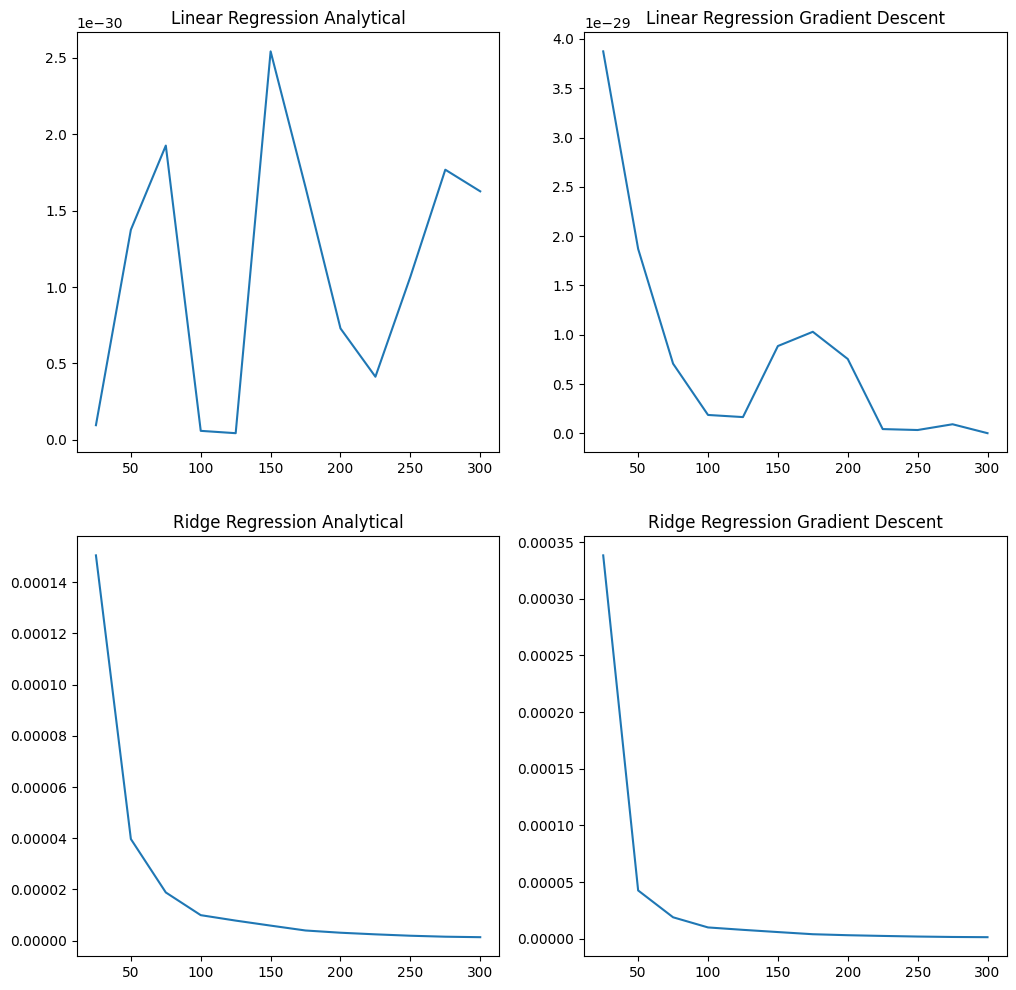

MSE for each approach
LR Analytical: [9.564938475804768e-32, 1.37409708928185e-30, 1.9248206087392688e-30, 5.867152982581275e-32, 4.338734978715565e-32, 2.5411181909431842e-30, 1.6511844822407304e-30, 7.287102611979096e-31, 4.126728610437418e-31, 1.0664413362456553e-30, 1.7670484276950666e-30, 1.6255465028210474e-30]
LR Gradient Descent: [3.873652171281202e-29, 1.870685029118477e-29, 7.067700672714502e-30, 1.8676281931107456e-30, 1.6516775203064935e-30, 8.856442775303147e-30, 1.0301044307989125e-29, 7.542003291978636e-30, 4.348595740030828e-31, 3.4019626537656136e-31, 9.2395333524011e-31, 1.873544649899903e-32]
RR Analytical: [0.0001504767569265347, 3.966330169832807e-05, 1.87946018872349e-05, 9.921738293150733e-06, 7.796883240902401e-06, 5.839133208035727e-06, 3.930550362563046e-06, 3.0604536436468713e-06, 2.427802132083911e-06, 1.8855723508593247e-06, 1.5079419954119085e-06, 1.3176207098187238e-06]
RR Gradient Descent: [0.0003382029546516032, 4.255701329953987e-05, 1.8876007828332644

In [12]:
# Problem 3 comparisons
num_example = 1000
input_dim = 1
epochs = 10000
lr = 0.001
alpha = 0.069
train_perc = 0.9
reset_seed(1)

data, gt_y = generate_data(num_example, input_dim)
data_train, y_train, data_test, y_test = train_test_split(data, gt_y, train_perc)
mse_lr = []
mse_lr_gd = []
mse_rr = []
mse_rr_gd = []

for num_train in range(25, 301, 25):
    X = data_train[:num_train, :]
    y = y_train[:num_train]
    parameters_lr = lin_reg_analyt(X, y)
    parameters_lr_gd = gd_linear_regression(X, y, epochs, lr)
    parameters_rr = ridge_regression_analyt(X, y, alpha)
    parameters_rr_gd = gd_ridge_regression(X, y, alpha, num_step, lr)
    mse_lr.append(np.mean((y_test - (data_test @ parameters_lr)) ** 2))
    mse_lr_gd.append(np.mean((y_test - (data_test @ parameters_lr_gd)) ** 2))
    mse_rr.append(np.mean((y_test - (data_test @ parameters_rr)) ** 2))
    mse_rr_gd.append(np.mean((y_test - (data_test @ parameters_rr_gd)) ** 2))

# Plotting
x = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

plt.figure(figsize=(12,12))
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.plot(x, mse_lr)
plt.title("Linear Regression Analytical")

plt.subplot(2, 2, 2)
plt.plot(x, mse_lr_gd)
plt.title("Linear Regression Gradient Descent")

plt.subplot(2, 2, 3)
plt.plot(x, mse_rr)
plt.title("Ridge Regression Analytical")

plt.subplot(2, 2, 4)
plt.plot(x, mse_rr_gd)
plt.title("Ridge Regression Gradient Descent")

plt.show()

# Printing MSE
print("MSE for each approach")
print("LR Analytical:", mse_lr)
print("LR Gradient Descent:", mse_lr_gd)
print("RR Analytical:", mse_rr)
print("RR Gradient Descent:", mse_rr_gd)


**Answer 3:**

The MSE for both linear regression approaches were basically 0 (around the 1e-29 to 1e-32 range). The number of training examples only affected the performance of the gradient descent approach, which makes sense since more training examples will represent a more accurate direction when computing the gradient.

The MSE for both ridge regression approaches were relatively a lot higher (around the 1e-5 to 1e-6 range), but still fairly close to 0. The only difference between linear and ridge is the normalization factor, so this indicates that perhaps we don't need to a normalization factor on this specific dataset, and should stick with linear regression. However, as we increased the number of training examples, the MSE consistently decreased. This makes sense since having more example points will provide more context that generalizes better in the analytical case, and a more accurate direction to step in the gradient descent case.